 <h1 align=center> Building a Predictive Model- A Generic Approach </h1> 


## Content

- How to participate in Hackathons.
- Approach used
- A standard template
-----

![stratgey.png](../images/stratgey.png)

A Standard approach to building a prdictive model would involve the following steps. This is the essence of how you win competitions and hackathons or at least set bench mark for yourself and improve from there. Lets walk through the steps. 

- Descriptive analysis on the Data – 50% time
- Data treatment (Missing value and outlier fixing) – 40% time
- Data Modelling – 4% time
- Estimation of performance – 6% time

Most of these techniques are discussed in the previous sessions 

![you_know_it.jpg](../images/you_know_it.jpg)


### Problem Statement
"Bank of Gardenia" (BoG) has another problem for you. This time they want you to take care of customer retention for their product; savings accounts. This is a problem from [Analytics Vidhya](https://datahack.analyticsvidhya.com/contest/data-science-hackathon-churn-prediction/)
 
## The problem - Churn Prediction
BoG wants you to identify customers likely to churn balances in the next quarter by atleast 50% vis-a-vis current quarter. You have the customers information such as age, gender, demographics along with their assets, liabilities and transactions with the bank. Your task as a data scientist would be to predict the propensity to churn for each customer.
 
## Data provided
BoG has given a partial data (5 lakh customers) of their customers, along with their details like age, gender and demographics with their various relationships along all the products. We have three lakh customers in train and two lakh customers in test. You are expected to estimate the probability for each customer

______

Now lets walk through a simple template which can be used to set benchmark for yourself. We will use the churn prediction dataset of churn prediction [Analytics Vidhya](https://datahack.analyticsvidhya.com/contest/data-science-hackathon-churn-prediction/). A General template will have the following format.

- Check which features to use In this case we are asked to drop the customer ID from the features.
- Cleaning data
  - Imputing missing values in numerical Data
  - Imputing missing values in Categorical Data
- Encode Categorical Data
- Build Model typically used are GBM / Random Forest techniques, depending on the business problem. These two techniques are extremely effective to create a benchmark solution

------


Most of the masters on Kaggle and the best scientists on our hackathons have these codes ready and fire their first submission before making a detailed analysis. Once they have some estimate of benchmark, they start improvising further.

In [1]:


import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

In [2]:
train = pd.read_csv('../data/train.csv')

/Users/abhisheksubramanian/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (294,299,300,302,307,313,315,365,367,369) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.drop('UCIC_ID',axis=1,inplace=True)



In [4]:
X = train.drop('Responders',axis=1)
Y = train['Responders']

In [5]:
data_numeric = set(X._get_numeric_data())
data_categorical = list(set(X.columns)-data_numeric)

In [6]:
X[list(data_numeric)].isnull().sum()

IB_D_prev6                           0
IB_C_prev1                           0
COUNT_POS_D_prev1                    0
custinit_DR_cnt_prev3           116621
ATM_amt_prev5                   229527
BRANCH_D_prev1                       0
custinit_CR_amt_prev3           210311
ATM_C_prev6                          0
BL_PREM_CLOSED_PREVQ1           299856
COUNT_POS_C_prev5                    0
C_prev4                              0
TWL_Closed_PrevQ1               299879
BRN_CASH_Dep_Amt_prev1          266388
I_CNR_PrevQ2                         0
BRANCH_D_prev3                       0
count_No_of_MF_PrevQ1           272500
count_C_prev2                        0
NO_OF_Accs                           0
I_NRV_PrevQ2                         0
ATM_CW_Cnt_prev6                238584
custinit_CR_amt_prev5           210710
CV_Closed_PrevQ1                299924
MB_D_prev2                           0
COUNT_BRANCH_D_prev1                 0
CR_AMB_Prev1                         0
COUNT_POS_C_prev6        

In [7]:
#X['Recency_of_CR_TXN'] = X['Recency_of_CR_TXN'].fillna(X['Recency_of_CR_TXN'].mean())

Pandas has a method [fillna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) which is extremely useful in imputing missing values. This method is used below

In [8]:
X[list(data_numeric)]=X[list(data_numeric)].fillna(X[list(data_numeric)].mean())
X.fillna(-9999,inplace=True)

In [9]:
for i in data_categorical:
    lab = LabelEncoder()
    X[i] = lab.fit_transform(X[i].astype('str'))

In [10]:
X_train,X_valid,Y_train,Y_valid = train_test_split(X,Y,test_size=0.2,random_state=99)

In [11]:
rf = RandomForestClassifier(n_estimators=1000,verbose=True,n_jobs=-1)
rf.fit(X_train,Y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 28.4min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=True,
            warm_start=False)

In [12]:
con = confusion_matrix(Y_valid,rf.predict(X_valid))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    7.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   13.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   17.9s finished


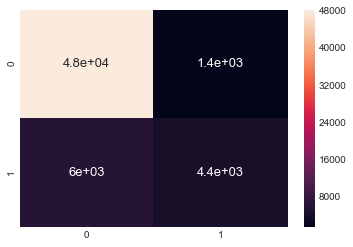

In [13]:
sns.heatmap(con,annot=True,annot_kws={"size": 13})

In [14]:
print(classification_report(Y_valid,rf.predict(X_valid)))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    8.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   13.8s


             precision    recall  f1-score   support

          0       0.89      0.97      0.93     49553
          1       0.76      0.42      0.54     10447

avg / total       0.87      0.88      0.86     60000



[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   17.0s finished


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   10.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   18.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   22.7s finished


Text(0,0.5,'TPR')

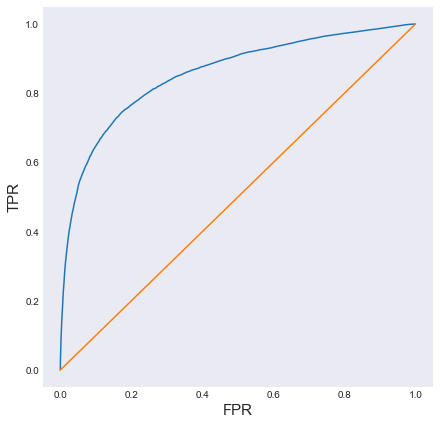

In [16]:
y_pred  = rf.predict_proba(X_valid)[:,1]
fpr,tpr,_ = roc_curve(Y_valid,y_pred)

plt.figure(figsize=(7,7))
plt.plot(fpr,tpr)
plt.plot((0,1),(0,1))
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)

## Going further

Once the benchmark is established measures can be taken to improve the performance of the model. What can be done.

- Data cleaning for test data set to make predictions.
- Hyper Parameter Tuning.
- Going back to Feature Engineering
- Check and handle class imbalance if it exists.
- Testing Multiple models. 
- Submit